In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import yfinance as yf
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

## Equity Class

Class Attributes include:
- name
- df

Class Methods include:
- historical_volatility (The calculation was taken from [here](https://www.investopedia.com/ask/answers/021015/how-can-you-calculate-volatility-excel.asp))
- min_max_scale

Note:
- yfinance module can be found [here](https://libraries.io/pypi/fix-yahoo-finance)

In [2]:
class equity():
    
    def __init__(self, name):
        self.name = name
        self.df = yf.Ticker(name).history(period = 'max')
    
    def historical_volatility(self, lookback_in_days):
        def _return_on_price(current_price, previous_price):
            return (current_price/previous_price) - 1
        self.df['Close Shift'] = self.df['Close'].shift(1)
        self.df['Close Price Return'] = self.df.apply(lambda row : _return_on_price(row['Close'], row['Close Shift']), axis = 1)
        self.df['Rolling Volatility'] = np.sqrt(lookback_in_days) * self.df['Close Price Return'].rolling(lookback_in_days).std() * 100
        return self
    
    def min_max_scale(self, field_name):
        min_max_scaler = preprocessing.MinMaxScaler()
        self.df[field_name + ' Scaled'] = min_max_scaler.fit_transform(self.df[[field_name]])
        return self

In [3]:
def scaled_vol(name, lookback_in_days, field_name):
    eq = equity(name)
    df = eq.df
    df.append(eq.historical_volatility(lookback_in_days).min_max_scale(field_name).df)
    df_xs = df[field_name + ' Scaled']
    return df_xs[-lookback_in_days:]

In [4]:
ticker_list = ['RCL', 'MAR', 'BKNG', 'EXPE', 'TZOO', 'LVS']

In [5]:
all_data = []
all_data.clear()
df = pd.DataFrame()
for ticker in ticker_list:
    df [ticker] = scaled_vol(ticker, 30, 'Rolling Volatility')
    all_data.append(df)

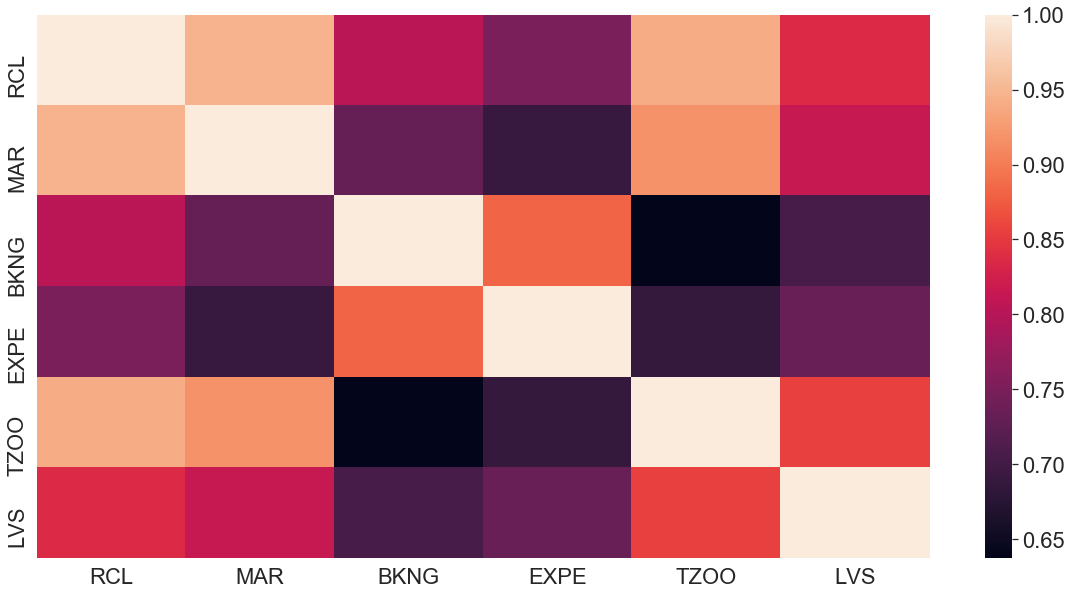

In [6]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(font_scale=2)
ax = sns.heatmap(df.corr())